# Logistic Regression

$\hat y = f(x) $

$\hat p = f(x) $

$ \hat p = \left \{ \begin{matrix} 1,  \quad \hat p \geqslant 0.5 \\ 0, \quad \hat p \leqslant 0.5 \end{matrix} \right.$

$$\hat p = \sigma (\theta ^T · X ) = \frac{1}{1+e^{-\theta ^T · X }}$$
###### Sigmoid function:
$$\sigma (t) = \frac{1}{1+e^{-t}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))
# np.exp(-t)：表示 e^-t 

In [3]:
x = np.linspace(-10, 10, 500)
y = sigmoid(x)

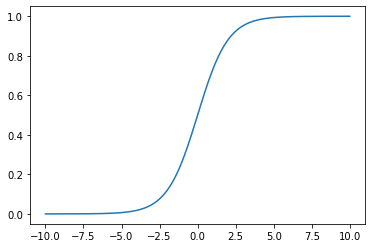

In [4]:
plt.plot(x, y)
plt.show()

## Loss Function
$ cost = \left \{ \begin{matrix} if\ y = 1,\quad p\ will\ be\ smaller, cost\ will\ be\ larger\\if\ y = 0,\quad p\ will\ be\ larger, cost\ will\ be\ larger \end{matrix} \right.$

-> -> ->

$ cost = \left \{ \begin{matrix} -log(\hat p), \quad if \ y=1 \\ -log(1-\hat p), \quad if\ y = 0 \end{matrix} \right.$

-> -> ->

$cost = -ylog(\hat p) - (1-y)log(1-\hat p)$

###### Total loss
$J(\theta) = -\frac{1}{m} \sum^m_{i = 1}y^ilog(\hat p^i) + (1-y^i)log(1-\hat p^i)$

$\hat p = \sigma (\theta ^T · X ) = \frac{1}{1+e^{-\theta ^T · X }}$

$J(\theta) = -\frac{1}{m} \sum^m_{i = 1}y^ilog(\theta ^T · X)^i + (1-y^i)log(1-(\theta ^T · X)^i)$

### Gredient Descent

$\frac{\partial J(\theta)}{\partial \theta _j} = \frac{1}{m}\sum (\sigma(X^i \theta)-y^i)X^i_j $

$\nabla J(\theta) = \frac{1}{m}  X^T(\sigma (X\theta)-y)$

## Use own package

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2, :2]
y = y[y<2]

In [7]:
X.shape

(100, 2)

In [8]:
y.shape

(100,)

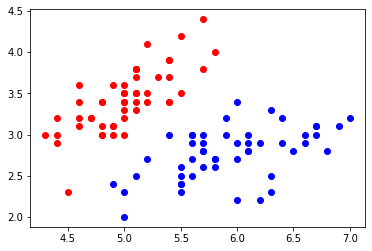

In [9]:
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'red')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'blue')
plt.show()

In [10]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [11]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [12]:
log_reg.score(X_test, y_test)

1.0

In [13]:
log_reg.predict_proda(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [14]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

## Decision Boundary

Decision Boundary:
$\theta X = 0$

In [15]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

In [16]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

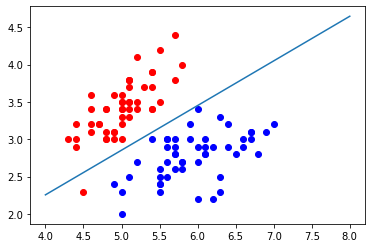

In [17]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.plot(x1_plot, x2_plot)
plt.show()

#### Irregular Decision Boundary

In [18]:
def plot_decision_boundary(model, axis):
    # model：算法模型；
    # axis：区域坐标轴的范围，其中 0,1,2,3 分别对应 x 轴和 y 轴的范围；
    
    # 1）将坐标轴等分为无数的小点，将 x、y 轴分别等分 （坐标轴范围最大值 - 坐标轴范围最小值）*100 份，
    # np.meshgrid()：
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    # np.c_()：
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    # 2）model.predict(X_new)：将分割出的所有的点，都使用模型预测
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    # 3）绘制预测结果
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


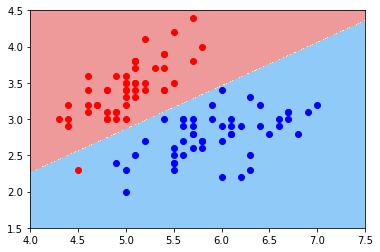

In [19]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


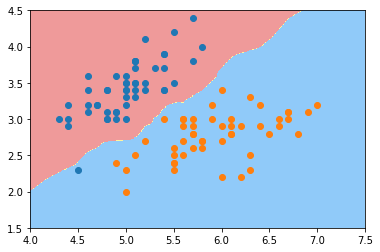

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [21]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier()

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


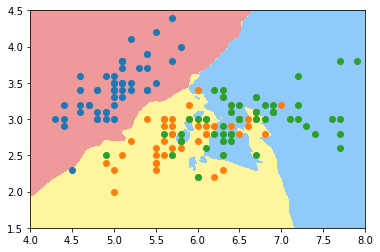

In [22]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

In [23]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(n_neighbors=50)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


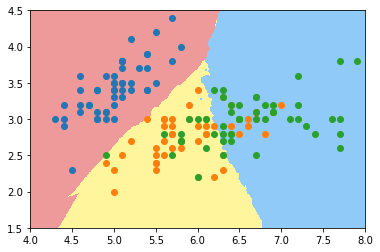

In [24]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

## Ploynomial Regression in Logistic Regression

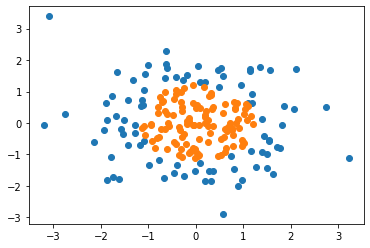

In [25]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5, dtype='int')

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [26]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


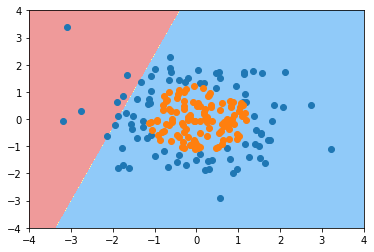

In [27]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [29]:
def PolynomialLogisticRegression(degree):
    return Pipeline([
        # 管道第一步：给样本特征添加多形式项；
        ('poly', PolynomialFeatures(degree=degree)),
        # 管道第二步：数据归一化处理；
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [30]:
poly_log_reg = PolynomialLogisticRegression(degree=20)
poly_log_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'
/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


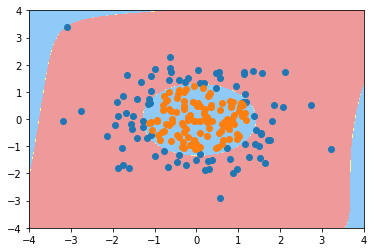

In [31]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## Sklearn in Logistic Regression

### Normalization
$C·J(\theta)+L1$

$C·J(\theta)+L2$

In [32]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:,1] < 1.5,dtype='int')

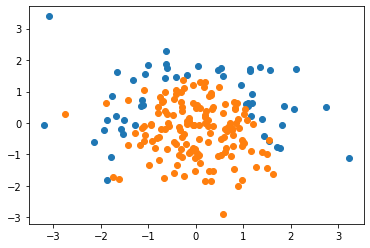

In [33]:
for _ in range(20):
    y[np.random.randint(200)] = 1

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [36]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [37]:
log_reg.score(X_test, y_test)

0.86

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


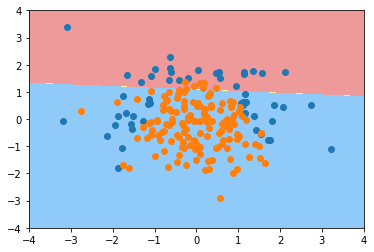

In [38]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [39]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


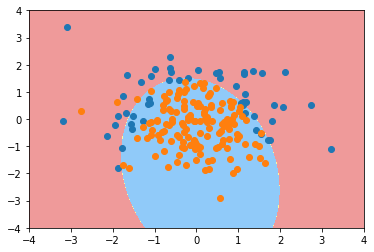

In [40]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [41]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [42]:
poly_log_reg2.score(X_train, y_train)

0.94

In [43]:
poly_log_reg2.score(X_test, y_test)

0.92

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


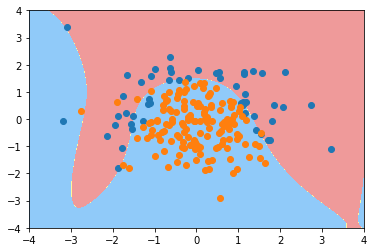

In [44]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [45]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

In [46]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg3.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(C=0.1))])

In [47]:
poly_log_reg3.score(X_train, y_train)

0.84

In [48]:
poly_log_reg3.score(X_test, y_test)

0.92

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


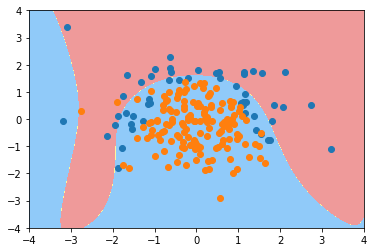

In [49]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [50]:
def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty, solver='liblinear'))
    ])

In [51]:
poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1')
poly_log_reg4.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

Normalization 选择 l1 出错：
决定惩罚项选择的有2个参数：dual和solver，如果要选L1范数，dual必须是False，solver必须是liblinear

问题搞清楚了，把上面代码改成：

LogisticRegression(C = c_param, penalty = 'l1',solver='liblinear')

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


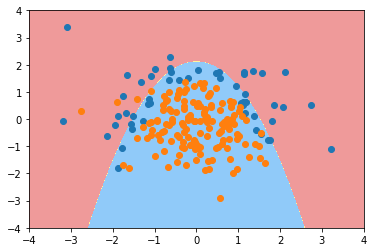

In [52]:
plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()